# Machine Learning : Logistic Regression | Gradient Descent 
The purpose of this exercise is to understand how gradient descent and cost function can be used to find the parameters in a logistic regression.

   ## Table of Contents

  * <a href="#1"> Dataset</a>
  * <a href="#2"> Considerations</a>
  * <a href="#3"> Plotting the Data</a>
  * <a href="#4"> Gradient Descent </a>
  * <a href="#5"> Cost Function</a>
  * <a href="#6"> Implementation </a>
  * <a href="#6.1"> Visualizing</a>
  * <a href="#7"> Logistic Regression using sklearn library</a>
  * <a href="#8"> Conclusion</a>
  * <a href="#9"> References</a>

In [1]:
#importing libraries

import numpy as np #work with arrays

import pandas as pd #dataset management

import matplotlib.pyplot as plt #Visualization
%matplotlib inline
import seaborn as sns

from sklearn import datasets #importing dataset
from sklearn import svm #Visualization

<a id='1'></a>
## Dataset

For this exercise we are going to use a pre-built dataset from the sklearn package to classify types of wine.

From the file below, we can conclude that it is a dictionary where one of the keys is the description of it 'DESCR', let's open up this key to read the file contents in a formatted way. 

The dataset has 13 numeric Attributes and 3 different types of classes of wine.

In [2]:
df = datasets.load_wine()
print(df['DESCR'])

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

<a id='2'></a>
## Considerations
For the purpose of this exercise we are going to consider only two features of the dataset (Alcohol and Malic acid). Also to simplify this exercise as a binary problem we are not going to consider the last class (class_2).

We are going to build a logistic regression model to predict whether a wine is classified as class_0 or class_1 from the features Alcohol and Malic Acid.

In [3]:
X = df.data[:, :2]
y= (df.target != 2)*1

<a id='3'></a>
## Plotting the Data
Firstly, let's visualize the data using a scatter plot as we only have two variables to plot (Alcohol x Malic Acid).

This is an important step to get a felling of what is the relationship of the feature with the target.
- Blue dots represent wines classified as class **ZERO**
- Red dots represent wines classified as class **ONE**

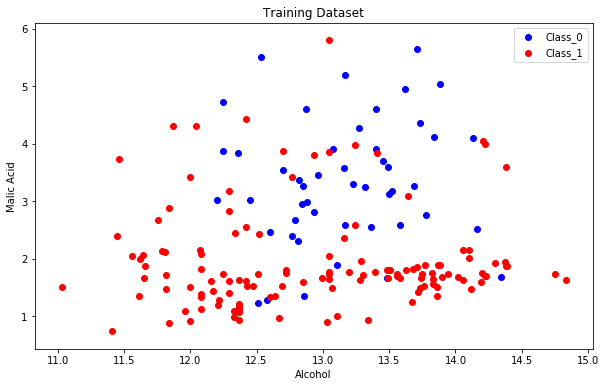

In [4]:
plt.figure(figsize=(10, 6))
plt.title('Training Dataset')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='Class_0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='Class_1')
plt.legend();

<a id='4'></a>
# Gradient Descent

The purpose of this section is to minimize the cost function with a linear regression to obtain the  $\theta_0$ and $\theta_1$ that best fit out dataset.

### Hypothesis Representation
The logistic regression hypothesis is defined by the following function:

$h_{\theta}(x) = g(\theta^{T}x)$

where $g$ can be called Sigmoid function or Logistic function defined by:

$g(z) = \frac{1}{1+e^{-z}}$

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

<a id='5'></a>
## Cost Function
The cost function is represented by the equation below:

$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}{[-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}) )]}$

Using the batch gradient descent algorithm below the parameters $\theta$j will come closer to the optimal values that will achieve the lowest cost J($\theta$):

$\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}}$


In [6]:
def calc_cost(X, y,fit_intercept=True,lr=0.01,num_iter=100000,verbose=False):
    if fit_intercept:
        X = np.concatenate(((np.ones((X.shape[0], 1))), X), axis=1)

    theta = np.zeros(X.shape[1])

    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= lr * gradient

        z = np.dot(X, theta)
        h = sigmoid(z)
        cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

        if(verbose ==True and i % 10000 == 0):
            print(f'cost: {cost} \t')
    
    return theta



<a id='6'></a>
## Implementation
We are going to apply 100000 iterations and alpha (learning rate) as 0.01 for starting our tests.

In [7]:
def predict_prob(X, theta, fit_intercept=True):
    if fit_intercept:
        X = np.concatenate(((np.ones((X.shape[0], 1))), X), axis=1)

    return sigmoid(np.dot(X, theta))

def predict(X,theta, fit_intercept=True):
    return predict_prob(X, theta, fit_intercept).round()

In [8]:
%time theta_fit = calc_cost(X, y,fit_intercept=True,lr=0.01,num_iter=100000,verbose=False)

Wall time: 5.75 s


In [9]:
preds = predict(X,theta_fit, fit_intercept=True)
(preds == y).mean()

0.7640449438202247

In [10]:
theta_fit

array([ 3.27353151,  0.05142508, -1.16049669])

In [11]:
probs = predict_prob(X, theta_fit, fit_intercept=True)


<font color='red'>
    
<a id='6.1'></a>
## Visualizing
</font>

In [12]:
#I'm still working on this section
'''
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
'''

"\nplt.figure(figsize=(10, 6))\nplt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')\nplt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')\nplt.legend()\nx1_min, x1_max = X[:,0].min(), X[:,0].max(),\nx2_min, x2_max = X[:,1].min(), X[:,1].max(),\nxx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))\ngrid = np.c_[xx1.ravel(), xx2.ravel()]\nprobs = model.predict_prob(grid).reshape(xx1.shape)\nplt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');\n"

<a id='7'></a>
# Logistic Regression using sklearn library

The few lines of code below demonstrate how sklearn can be used to calculate the parameters.

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e20)
%time model.fit(X, y)

Wall time: 2 ms


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
preds = model.predict(X)
(preds == y).mean()

0.7865168539325843

In [15]:
model.intercept_, model.coef_

(array([8.50668103]), array([[-0.33745982, -1.21184854]]))

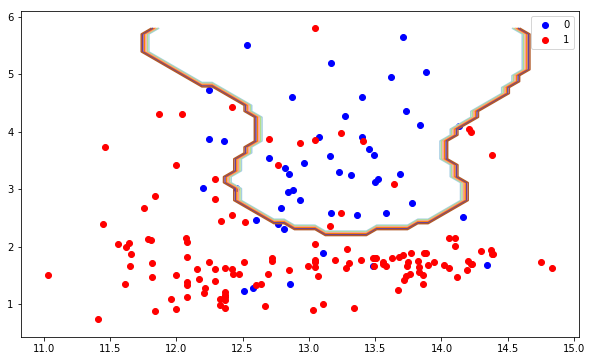

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()


C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'rbf',  gamma=1, C=1 )
clf.fit(X, y)

h = .02  # step size in the mesh
# create a mesh to plot in
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

<a id='8'></a>
## Conclusion

Comparing both methods to converge the cost function and find the best parameters we can note that there is a big difference is about training time, sklearn runs much faster than the analytical method. 

We could decrease the learning rate or use more iterations or regularize the model to obtain better parameters, but this is not the purpose of this exercise. 

We used a different approach to plot the division boundary from the sklearn learn module. We can improve it's accuracy changing gama and (C) regulation coeficients. 

<a id='9'></a>
## References

- https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac | Martin Pellarolo

- https://www.coursera.org/learn/machine-learning/home/welcome | Andrew Ng
